# MNIST dataset

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/220px-MnistExamples.png)

##### The MNIST(Modified National Institute of Standards and Technology) database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

* Import gzip to open gz file extention type files


In [1]:
# https://docs.python.org/2/library/gzip.html
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()


In [2]:
# read the first 20 bytes of the file 
file_content[0:20]

b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00"

In [3]:
# find the type of information stores in the file
type(file_content)

bytes

In [4]:
# read in big indian what the first 4 bytes of the file mean This is the magic number in this case
int.from_bytes(file_content[0:4], byteorder="big")

2051

In [5]:
# read the second 4 bytes of information from the file. This is the number for records in the file 
int.from_bytes(file_content[4:8], byteorder='big')

10000

In [6]:
# 28 is the outcome of the 3rd 4 bytes of the file. This is the dimentions of the file
int.from_bytes(file_content[8:12], byteorder='big')

28

In [7]:
# 28 is the dimentions of the file
int.from_bytes(file_content[12:16], byteorder='big')

28

In [8]:
int.from_bytes(file_content[278:279], byteorder='big')

163

In [9]:
l = file_content[16:800]

In [10]:
type(l)

bytes

#### View Images
* Change all imgames so thay the background of the image is white and the writting is black ~
* Use matplotlib to help the user display the images on a graph

In [ ]:
# import numpy this is used to display the file content.
import numpy as np

image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

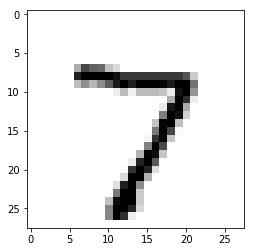

In [12]:
# import matplotlib this enables the used to see the digits graphically.
%matplotlib inline
import matplotlib.pyplot as plt

# show the image the first 784(28*28) bytes of image
plt.imshow(image, cmap='gray')

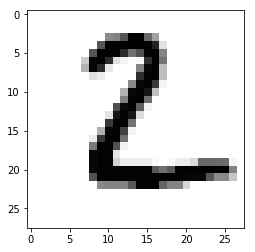

In [13]:
image1 = ~np.array(list(file_content[800:1584])).reshape(28,28).astype(np.uint8)
plt.imshow(image1, cmap='gray')

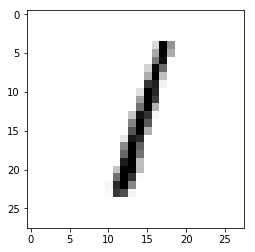

In [14]:
image2 = ~np.array(list(file_content[1584:2368])).reshape(28,28).astype(np.uint8)
plt.imshow(image2, cmap='gray')

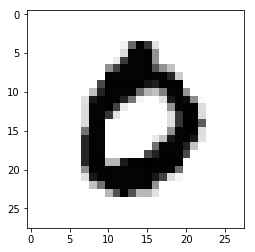

In [15]:
image1 = ~np.array(list(file_content[2368:3152])).reshape(28,28).astype(np.uint8)
plt.imshow(image1, cmap='gray')

#### Check Images against labels
* unzip the labels training files
* The first 8 bytes of this file are reserved as stated on the mnist website.
* each byte after that represents a value for the corrisponding digit in the training images file

In [16]:
# open the test lable package 
import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [17]:
# first 8 bytes of the file are used for magic number etc.
# get the digit at bytes 8:9 (byes 8-9 not inclusing 9)
int.from_bytes(labels[8:9], byteorder="big")

7

In [18]:
int.from_bytes(labels[9:10], byteorder="big")

2

In [19]:
int.from_bytes(labels[10:11], byteorder="big")

1

In [20]:
int.from_bytes(labels[11:12], byteorder="big")

0

#### Determining file Type
* Create an array to store the images
* Locate the files within your directory
* Fine the directory and print out file names to be sure you are correct
* If the files end in ubyte , read the file content
* if the magic number (first 4 bytes) = 2051 then this files is a file containing images
* if the magic number (first 4 bytes) = 2046 then the file contains labels.
* bytes 4:8 of each file contain the size of the file This helps to determine if the file is test or training file 
* rename the files in the array.key accoring the their type

In [21]:
# create an array called storeArray to hold the contents of the file
storeArray = {}

In [22]:
# path is the reference to MIST_data file in the current directory.
path = "MNIST_data/"

In [23]:
# imports needed to save the images
import os
import shutil
from skimage.io import imsave

In [24]:
# print the files found in the MIST_data folder.
files = os.listdir(path)

print(files)

['t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte', 'test', 'train', 'train-images.idx3-ubyte', 'train-labels.idx1-ubyte']


In [25]:
# loop though the files
for file in files:
    # if the file name ends in ubyte open the file and read in the contents of that file
    if file.endswith ("ubyte"):
        with open (path+file,'rb') as f:
            byte = f.read()
            magicNumber = int.from_bytes(byte[0:4], byteorder='big')
            
            imageSize = int.from_bytes(byte[4:8], byteorder='big')
            
            # when the magic number/first 4 bytes =2051 , let the lable of this be called images.
            if(magicNumber == 2051):
                lable = 'images'
                # distigush between the [8:12] and [12:16] the rows and columns of this file(28 *28)
                rows = int.from_bytes(byte[8:12], byteorder='big')
                
                cols =int.from_bytes(byte[12:16], byteorder='big')
                
                # read after the first 16 bytes which each are distingished above.
                shape = np.frombuffer(byte,dtype = np.uint8, offset = 16)
                # reshape changed the strcture of the array
                shape =shape.reshape(imageSize,rows,cols)
            
            #if magic number / [0:4] = 2049 lable the file a lable
            
            elif (magicNumber == 2049):# lable
                lable = 'lable'
                shape = np.frombuffer(byte,dtype = np.uint8,offset = 8)
                # reshape changed the strcture of the array
                shape =shape.reshape(imageSize)
            # if imageSize/number of images/lables=10000 it is the test dataset 
            # else if the number of images/lables 60000 its the training set
            if (imageSize == 10000):
                imageTest = 'test'
            elif(imageSize == 60000):
                imageTest = 'train'
            
            storeArray[imageTest+lable] = shape

In [26]:
# based on the number of images/lables and the magic number each file is given a lable/key
storeArray.keys()

dict_keys(['testimages', 'testlable', 'trainimages', 'trainlable'])

In [27]:
storeArray['testimages'][10,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61,   3,
         42, 118, 193, 118, 118,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 179, 245, 236,
        242, 254, 254, 254, 254, 245, 235,  84,   0,   0,   0,   0,   0,
          0,   0],
       [  

#### Saving images 

In [ ]:
# folders creates called either test or train storing png files
folders = ['train','test']

for folder in folders:
    img = storeArray[folder + 'images']
    
    lables = storeArray[folder + 'lable']
    
    # getting the shape of the array
    shape = img.shape[0]

    for i in range(shape):
        print(folder,i)
        
        # getting the current image 
        image = img[i]
        # getting the current lable
        label = lables[i]
        
        if not os.path.exists(path+folder+'/'+str(label)+'/'):
            os.makedirs(path+folder+'/'+str(label)+'/')
        length =len(os.listdir(path+folder+'/'+str(label)+'/'))
        imsave(path+folder+'/'+str(label)+'/%05d.png'%(length+1),image)
    
    

train 0
train 1
train 2
train 3
train 4
train 5
train 6
train 7
train 8
train 9
train 10
train 11
train 12
train 13
train 14
train 15
train 16
train 17
train 18
train 19
train 20
train 21
train 22
train 23
train 24
train 25
train 26
train 27
train 28
train 29
train 30
train 31
train 32
train 33
train 34
train 35
train 36
train 37
train 38
train 39
train 40
train 41
train 42
train 43
train 44
train 45
train 46
train 47
train 48
train 49
train 50
train 51
train 52
train 53
train 54
train 55
train 56
train 57
train 58
train 59
train 60
train 61
train 62
train 63
train 64
train 65
train 66
train 67
train 68
train 69
train 70
train 71
train 72
train 73
train 74
train 75
train 76
train 77
train 78
train 79
train 80
train 81
train 82
train 83
train 84
train 85
train 86
train 87
train 88
train 89
train 90
train 91
train 92
train 93
train 94
train 95
train 96
train 97
train 98
train 99
train 100
train 101
train 102
train 103
train 104
train 105
train 106
train 107
train 108
train 109
train 110


train 833
train 834
train 835
train 836
train 837
train 838
train 839
train 840
train 841
train 842
train 843
train 844
train 845
train 846
train 847
train 848
train 849
train 850
train 851
train 852
train 853
train 854
train 855
train 856
train 857
train 858
train 859
train 860
train 861
train 862
train 863
train 864
train 865
train 866
train 867
train 868
train 869
train 870
train 871
train 872
train 873
train 874
train 875
train 876
train 877
train 878
train 879
train 880
train 881
train 882
train 883
train 884
train 885
train 886
train 887
train 888
train 889
train 890
train 891
train 892
train 893
train 894
train 895
train 896
train 897
train 898
train 899
train 900
train 901
train 902
train 903
train 904
train 905
train 906
train 907
train 908
train 909
train 910
train 911
train 912
train 913
train 914
train 915
train 916
train 917
train 918
train 919
train 920
train 921
train 922
train 923
train 924
train 925
train 926
train 927
train 928
train 929
train 930
train 931
train 932


train 1593
train 1594
train 1595
train 1596
train 1597
train 1598
train 1599
train 1600
train 1601
train 1602
train 1603
train 1604
train 1605
train 1606
train 1607
train 1608
train 1609
train 1610
train 1611
train 1612
train 1613
train 1614
train 1615
train 1616
train 1617
train 1618
train 1619
train 1620
train 1621
train 1622
train 1623
train 1624
train 1625
train 1626
train 1627
train 1628
train 1629
train 1630
train 1631
train 1632
train 1633
train 1634
train 1635
train 1636
train 1637
train 1638
train 1639
train 1640
train 1641
train 1642
train 1643
train 1644
train 1645
train 1646
train 1647
train 1648
train 1649
train 1650
train 1651
train 1652
train 1653
train 1654
train 1655
train 1656
train 1657
train 1658
train 1659
train 1660
train 1661
train 1662
train 1663
train 1664
train 1665
train 1666
train 1667
train 1668
train 1669
train 1670
train 1671
train 1672
train 1673
train 1674
train 1675
train 1676
train 1677
train 1678
train 1679
train 1680
train 1681
train 1682
train 1683

train 2342
train 2343
train 2344
train 2345
train 2346
train 2347
train 2348
train 2349
train 2350
train 2351
train 2352
train 2353
train 2354
train 2355
train 2356
train 2357
train 2358
train 2359
train 2360
train 2361
train 2362
train 2363
train 2364
train 2365
train 2366
train 2367
train 2368
train 2369
train 2370
train 2371
train 2372
train 2373
train 2374
train 2375
train 2376
train 2377
train 2378
train 2379
train 2380
train 2381
train 2382
train 2383
train 2384
train 2385
train 2386
train 2387
train 2388
train 2389
train 2390
train 2391
train 2392
train 2393
train 2394
train 2395
train 2396
train 2397
train 2398
train 2399
train 2400
train 2401
train 2402
train 2403
train 2404
train 2405
train 2406
train 2407
train 2408
train 2409
train 2410
train 2411
train 2412
train 2413
train 2414
train 2415
train 2416
train 2417
train 2418
train 2419
train 2420
train 2421
train 2422
train 2423
train 2424
train 2425
train 2426
train 2427
train 2428
train 2429
train 2430
train 2431
train 2432

train 3088
train 3089
train 3090
train 3091
train 3092
train 3093
train 3094
train 3095
train 3096
train 3097
train 3098
train 3099
train 3100
train 3101
train 3102
train 3103
train 3104
train 3105
train 3106
train 3107
train 3108
train 3109
train 3110
train 3111
train 3112
train 3113
train 3114
train 3115
train 3116
train 3117
train 3118
train 3119
train 3120
train 3121
train 3122
train 3123
train 3124
train 3125
train 3126
train 3127
train 3128
train 3129
train 3130
train 3131
train 3132
train 3133
train 3134
train 3135
train 3136
train 3137
train 3138
train 3139
train 3140
train 3141
train 3142
train 3143
train 3144
train 3145
train 3146
train 3147
train 3148
train 3149
train 3150
train 3151
train 3152
train 3153
train 3154
train 3155
train 3156
train 3157
train 3158
train 3159
train 3160
train 3161
train 3162
train 3163
train 3164
train 3165
train 3166
train 3167
train 3168
train 3169
train 3170
train 3171
train 3172
train 3173
train 3174
train 3175
train 3176
train 3177
train 3178

train 3835
train 3836
train 3837
train 3838
train 3839
train 3840
train 3841
train 3842
train 3843
train 3844
train 3845
train 3846
train 3847
train 3848
train 3849
train 3850
train 3851
train 3852
train 3853
train 3854
train 3855
train 3856
train 3857
train 3858
train 3859
train 3860
train 3861
train 3862
train 3863
train 3864
train 3865
train 3866
train 3867
train 3868
train 3869
train 3870
train 3871
train 3872
train 3873
train 3874
train 3875
train 3876
train 3877
train 3878
train 3879
train 3880
train 3881
train 3882
train 3883
train 3884
train 3885
train 3886
train 3887
train 3888
train 3889
train 3890
train 3891
train 3892
train 3893
train 3894
train 3895
train 3896
train 3897
train 3898
train 3899
train 3900
train 3901
train 3902
train 3903
train 3904
train 3905
train 3906
train 3907
train 3908
train 3909
train 3910
train 3911
train 3912
train 3913
train 3914
train 3915
train 3916
train 3917
train 3918
train 3919
train 3920
train 3921
train 3922
train 3923
train 3924
train 3925

train 4584
train 4585
train 4586
train 4587
train 4588
train 4589
train 4590
train 4591
train 4592
train 4593
train 4594
train 4595
train 4596
train 4597
train 4598
train 4599
train 4600
train 4601
train 4602
train 4603
train 4604
train 4605
train 4606
train 4607
train 4608
train 4609
train 4610
train 4611
train 4612
train 4613
train 4614
train 4615
train 4616
train 4617
train 4618
train 4619
train 4620
train 4621
train 4622
train 4623
train 4624
train 4625
train 4626
train 4627
train 4628
train 4629
train 4630
train 4631
train 4632
train 4633
train 4634
train 4635
train 4636
train 4637
train 4638
train 4639
train 4640
train 4641
train 4642
train 4643
train 4644
train 4645
train 4646
train 4647
train 4648
train 4649
train 4650
train 4651
train 4652
train 4653
train 4654
train 4655
train 4656
train 4657
train 4658
train 4659
train 4660
train 4661
train 4662
train 4663
train 4664
train 4665
train 4666
train 4667
train 4668
train 4669
train 4670
train 4671
train 4672
train 4673
train 4674

train 5330
train 5331
train 5332
train 5333
train 5334
train 5335
train 5336
train 5337
train 5338
train 5339
train 5340
train 5341
train 5342
train 5343
train 5344
train 5345
train 5346
train 5347
train 5348
train 5349
train 5350
train 5351
train 5352
train 5353
train 5354
train 5355
train 5356
train 5357
train 5358
train 5359
train 5360
train 5361
train 5362
train 5363
train 5364
train 5365
train 5366
train 5367
train 5368
train 5369
train 5370
train 5371
train 5372
train 5373
train 5374
train 5375
train 5376
train 5377
train 5378
train 5379
train 5380
train 5381
train 5382
train 5383
train 5384
train 5385
train 5386
train 5387
train 5388
train 5389
train 5390
train 5391
train 5392
train 5393
train 5394
train 5395
train 5396
train 5397
train 5398
train 5399
train 5400
train 5401
train 5402
train 5403
train 5404
train 5405
train 5406
train 5407
train 5408
train 5409
train 5410
train 5411
train 5412
train 5413
train 5414
train 5415
train 5416
train 5417
train 5418
train 5419
train 5420

train 6076
train 6077
train 6078
train 6079
train 6080
train 6081
train 6082
train 6083
train 6084
train 6085
train 6086
train 6087
train 6088
train 6089
train 6090
train 6091
train 6092
train 6093
train 6094
train 6095
train 6096
train 6097
train 6098
train 6099
train 6100
train 6101
train 6102
train 6103
train 6104
train 6105
train 6106
train 6107
train 6108
train 6109
train 6110
train 6111
train 6112
train 6113
train 6114
train 6115
train 6116
train 6117
train 6118
train 6119
train 6120
train 6121
train 6122
train 6123
train 6124
train 6125
train 6126
train 6127
train 6128
train 6129
train 6130
train 6131
train 6132
train 6133
train 6134
train 6135
train 6136
train 6137
train 6138
train 6139
train 6140
train 6141
train 6142
train 6143
train 6144
train 6145
train 6146
train 6147
train 6148
train 6149
train 6150
train 6151
train 6152
train 6153
train 6154
train 6155
train 6156
train 6157
train 6158
train 6159
train 6160
train 6161
train 6162
train 6163
train 6164
train 6165
train 6166

train 6821
train 6822
train 6823
train 6824
train 6825
train 6826
train 6827
train 6828
train 6829
train 6830
train 6831
train 6832
train 6833
train 6834
train 6835
train 6836
train 6837
train 6838
train 6839
train 6840
train 6841
train 6842
train 6843
train 6844
train 6845
train 6846
train 6847
train 6848
train 6849
train 6850
train 6851
train 6852
train 6853
train 6854
train 6855
train 6856
train 6857
train 6858
train 6859
train 6860
train 6861
train 6862
train 6863
train 6864
train 6865
train 6866
train 6867
train 6868
train 6869
train 6870
train 6871
train 6872
train 6873
train 6874
train 6875
train 6876
train 6877
train 6878
train 6879
train 6880
train 6881
train 6882
train 6883
train 6884
train 6885
train 6886
train 6887
train 6888
train 6889
train 6890
train 6891
train 6892
train 6893
train 6894
train 6895
train 6896
train 6897
train 6898
train 6899
train 6900
train 6901
train 6902
train 6903
train 6904
train 6905
train 6906
train 6907
train 6908
train 6909
train 6910
train 6911

train 7566
train 7567
train 7568
train 7569
train 7570
train 7571
train 7572
train 7573
train 7574
train 7575
train 7576
train 7577
train 7578
train 7579
train 7580
train 7581
train 7582
train 7583
train 7584
train 7585
train 7586
train 7587
train 7588
train 7589
train 7590
train 7591
train 7592
train 7593
train 7594
train 7595
train 7596
train 7597
train 7598
train 7599
train 7600
train 7601
train 7602
train 7603
train 7604
train 7605
train 7606
train 7607
train 7608
train 7609
train 7610
train 7611
train 7612
train 7613
train 7614
train 7615
train 7616
train 7617
train 7618
train 7619
train 7620
train 7621
train 7622
train 7623
train 7624
train 7625
train 7626
train 7627
train 7628
train 7629
train 7630
train 7631
train 7632
train 7633
train 7634
train 7635
train 7636
train 7637
train 7638
train 7639
train 7640
train 7641
train 7642
train 7643
train 7644
train 7645
train 7646
train 7647
train 7648
train 7649
train 7650
train 7651
train 7652
train 7653
train 7654
train 7655
train 7656

train 8314
train 8315
train 8316
train 8317
train 8318
train 8319
train 8320
train 8321
train 8322
train 8323
train 8324
train 8325
train 8326
train 8327
train 8328
train 8329
train 8330
train 8331
train 8332
train 8333
train 8334
train 8335
train 8336
train 8337
train 8338
train 8339
train 8340
train 8341
train 8342
train 8343
train 8344
train 8345
train 8346
train 8347
train 8348
train 8349
train 8350
train 8351
train 8352
train 8353
train 8354
train 8355
train 8356
train 8357
train 8358
train 8359
train 8360
train 8361
train 8362
train 8363
train 8364
train 8365
train 8366
train 8367
train 8368
train 8369
train 8370
train 8371
train 8372
train 8373
train 8374
train 8375
train 8376
train 8377
train 8378
train 8379
train 8380
train 8381
train 8382
train 8383
train 8384
train 8385
train 8386
train 8387
train 8388
train 8389
train 8390
train 8391
train 8392
train 8393
train 8394
train 8395
train 8396
train 8397
train 8398
train 8399
train 8400
train 8401
train 8402
train 8403
train 8404

train 9060
train 9061
train 9062
train 9063
train 9064
train 9065
train 9066
train 9067
train 9068
train 9069
train 9070
train 9071
train 9072
train 9073
train 9074
train 9075
train 9076
train 9077
train 9078
train 9079
train 9080
train 9081
train 9082
train 9083
train 9084
train 9085
train 9086
train 9087
train 9088
train 9089
train 9090
train 9091
train 9092
train 9093
train 9094
train 9095
train 9096
train 9097
train 9098
train 9099
train 9100
train 9101
train 9102
train 9103
train 9104
train 9105
train 9106
train 9107
train 9108
train 9109
train 9110
train 9111
train 9112
train 9113
train 9114
train 9115
train 9116
train 9117
train 9118
train 9119
train 9120
train 9121
train 9122
train 9123
train 9124
train 9125
train 9126
train 9127
train 9128
train 9129
train 9130
train 9131
train 9132
train 9133
train 9134
train 9135
train 9136
train 9137
train 9138
train 9139
train 9140
train 9141
train 9142
train 9143
train 9144
train 9145
train 9146
train 9147
train 9148
train 9149
train 9150

train 9810
train 9811
train 9812
train 9813
train 9814
train 9815
train 9816
train 9817
train 9818
train 9819
train 9820
train 9821
train 9822
train 9823
train 9824
train 9825
train 9826
train 9827
train 9828
train 9829
train 9830
train 9831
train 9832
train 9833
train 9834
train 9835
train 9836
train 9837
train 9838
train 9839
train 9840
train 9841
train 9842
train 9843
train 9844
train 9845
train 9846
train 9847
train 9848
train 9849
train 9850
train 9851
train 9852
train 9853
train 9854
train 9855
train 9856
train 9857
train 9858
train 9859
train 9860
train 9861
train 9862
train 9863
train 9864
train 9865
train 9866
train 9867
train 9868
train 9869
train 9870
train 9871
train 9872
train 9873
train 9874
train 9875
train 9876
train 9877
train 9878
train 9879
train 9880
train 9881
train 9882
train 9883
train 9884
train 9885
train 9886
train 9887
train 9888
train 9889
train 9890
train 9891
train 9892
train 9893
train 9894
train 9895
train 9896
train 9897
train 9898
train 9899
train 9900

train 10511
train 10512
train 10513
train 10514
train 10515
train 10516
train 10517
train 10518
train 10519
train 10520
train 10521
train 10522
train 10523
train 10524
train 10525
train 10526
train 10527
train 10528
train 10529
train 10530
train 10531
train 10532
train 10533
train 10534
train 10535
train 10536
train 10537
train 10538
train 10539
train 10540
train 10541
train 10542
train 10543
train 10544
train 10545
train 10546
train 10547
train 10548
train 10549
train 10550
train 10551
train 10552
train 10553
train 10554
train 10555
train 10556
train 10557
train 10558
train 10559
train 10560
train 10561
train 10562
train 10563
train 10564
train 10565
train 10566
train 10567
train 10568
train 10569
train 10570
train 10571
train 10572
train 10573
train 10574
train 10575
train 10576
train 10577
train 10578
train 10579
train 10580
train 10581
train 10582
train 10583
train 10584
train 10585
train 10586
train 10587
train 10588
train 10589
train 10590
train 10591
train 10592
train 10593
trai

train 11197
train 11198
train 11199
train 11200
train 11201
train 11202
train 11203
train 11204
train 11205
train 11206
train 11207
train 11208
train 11209
train 11210
train 11211
train 11212
train 11213
train 11214
train 11215
train 11216
train 11217
train 11218
train 11219
train 11220
train 11221
train 11222
train 11223
train 11224
train 11225
train 11226
train 11227
train 11228
train 11229
train 11230
train 11231
train 11232
train 11233
train 11234
train 11235
train 11236
train 11237
train 11238
train 11239
train 11240
train 11241
train 11242
train 11243
train 11244
train 11245
train 11246
train 11247
train 11248
train 11249
train 11250
train 11251
train 11252
train 11253
train 11254
train 11255
train 11256
train 11257
train 11258
train 11259
train 11260
train 11261
train 11262
train 11263
train 11264
train 11265
train 11266
train 11267
train 11268
train 11269
train 11270
train 11271
train 11272
train 11273
train 11274
train 11275
train 11276
train 11277
train 11278
train 11279
trai

train 11882
train 11883
train 11884
train 11885
train 11886
train 11887
train 11888
train 11889
train 11890
train 11891
train 11892
train 11893
train 11894
train 11895
train 11896
train 11897
train 11898
train 11899
train 11900
train 11901
train 11902
train 11903
train 11904
train 11905
train 11906
train 11907
train 11908
train 11909
train 11910
train 11911
train 11912
train 11913
train 11914
train 11915
train 11916
train 11917
train 11918
train 11919
train 11920
train 11921
train 11922
train 11923
train 11924
train 11925
train 11926
train 11927
train 11928
train 11929
train 11930
train 11931
train 11932
train 11933
train 11934
train 11935
train 11936
train 11937
train 11938
train 11939
train 11940
train 11941
train 11942
train 11943
train 11944
train 11945
train 11946
train 11947
train 11948
train 11949
train 11950
train 11951
train 11952
train 11953
train 11954
train 11955
train 11956
train 11957
train 11958
train 11959
train 11960
train 11961
train 11962
train 11963
train 11964
trai

train 12567
train 12568
train 12569
train 12570
train 12571
train 12572
train 12573
train 12574
train 12575
train 12576
train 12577
train 12578
train 12579
train 12580
train 12581
train 12582
train 12583
train 12584
train 12585
train 12586
train 12587
train 12588
train 12589
train 12590
train 12591
train 12592
train 12593
train 12594
train 12595
train 12596
train 12597
train 12598
train 12599
train 12600
train 12601
train 12602
train 12603
train 12604
train 12605
train 12606
train 12607
train 12608
train 12609
train 12610
train 12611
train 12612
train 12613
train 12614
train 12615
train 12616
train 12617
train 12618
train 12619
train 12620
train 12621
train 12622
train 12623
train 12624
train 12625
train 12626
train 12627
train 12628
train 12629
train 12630
train 12631
train 12632
train 12633
train 12634
train 12635
train 12636
train 12637
train 12638
train 12639
train 12640
train 12641
train 12642
train 12643
train 12644
train 12645
train 12646
train 12647
train 12648
train 12649
trai

train 13255
train 13256
train 13257
train 13258
train 13259
train 13260
train 13261
train 13262
train 13263
train 13264
train 13265
train 13266
train 13267
train 13268
train 13269
train 13270
train 13271
train 13272
train 13273
train 13274
train 13275
train 13276
train 13277
train 13278
train 13279
train 13280
train 13281
train 13282
train 13283
train 13284
train 13285
train 13286
train 13287
train 13288
train 13289
train 13290
train 13291
train 13292
train 13293
train 13294
train 13295
train 13296
train 13297
train 13298
train 13299
train 13300
train 13301
train 13302
train 13303
train 13304
train 13305
train 13306
train 13307
train 13308
train 13309
train 13310
train 13311
train 13312
train 13313
train 13314
train 13315
train 13316
train 13317
train 13318
train 13319
train 13320
train 13321
train 13322
train 13323
train 13324
train 13325
train 13326
train 13327
train 13328
train 13329
train 13330
train 13331
train 13332
train 13333
train 13334
train 13335
train 13336
train 13337
trai

train 13940
train 13941
train 13942
train 13943
train 13944
train 13945
train 13946
train 13947
train 13948
train 13949
train 13950
train 13951
train 13952
train 13953
train 13954
train 13955
train 13956
train 13957
train 13958
train 13959
train 13960
train 13961
train 13962
train 13963
train 13964
train 13965
train 13966
train 13967
train 13968
train 13969
train 13970
train 13971
train 13972
train 13973
train 13974
train 13975
train 13976
train 13977
train 13978
train 13979
train 13980
train 13981
train 13982
train 13983
train 13984
train 13985
train 13986
train 13987
train 13988
train 13989
train 13990
train 13991
train 13992
train 13993
train 13994
train 13995
train 13996
train 13997
train 13998
train 13999
train 14000
train 14001
train 14002
train 14003
train 14004
train 14005
train 14006
train 14007
train 14008
train 14009
train 14010
train 14011
train 14012
train 14013
train 14014
train 14015
train 14016
train 14017
train 14018
train 14019
train 14020
train 14021
train 14022
trai

train 14627
train 14628
train 14629
train 14630
train 14631
train 14632
train 14633
train 14634
train 14635
train 14636
train 14637
train 14638
train 14639
train 14640
train 14641
train 14642
train 14643
train 14644
train 14645
train 14646
train 14647
train 14648
train 14649
train 14650
train 14651
train 14652
train 14653
train 14654
train 14655
train 14656
train 14657
train 14658
train 14659
train 14660
train 14661
train 14662
train 14663
train 14664
train 14665
train 14666
train 14667
train 14668
train 14669
train 14670
train 14671
train 14672
train 14673
train 14674
train 14675
train 14676
train 14677
train 14678
train 14679
train 14680
train 14681
train 14682
train 14683
train 14684
train 14685
train 14686
train 14687
train 14688
train 14689
train 14690
train 14691
train 14692
train 14693
train 14694
train 14695
train 14696
train 14697
train 14698
train 14699
train 14700
train 14701
train 14702
train 14703
train 14704
train 14705
train 14706
train 14707
train 14708
train 14709
trai

train 15310
train 15311
train 15312
train 15313
train 15314
train 15315
train 15316
train 15317
train 15318
train 15319
train 15320
train 15321
train 15322
train 15323
train 15324
train 15325
train 15326
train 15327
train 15328
train 15329
train 15330
train 15331
train 15332
train 15333
train 15334
train 15335
train 15336
train 15337
train 15338
train 15339
train 15340
train 15341
train 15342
train 15343
train 15344
train 15345
train 15346
train 15347
train 15348
train 15349
train 15350
train 15351
train 15352
train 15353
train 15354
train 15355
train 15356
train 15357
train 15358
train 15359
train 15360
train 15361
train 15362
train 15363
train 15364
train 15365
train 15366
train 15367
train 15368
train 15369
train 15370
train 15371
train 15372
train 15373
train 15374
train 15375
train 15376
train 15377
train 15378
train 15379
train 15380
train 15381
train 15382
train 15383
train 15384
train 15385
train 15386
train 15387
train 15388
train 15389
train 15390
train 15391
train 15392
trai

train 15996
train 15997
train 15998
train 15999
train 16000
train 16001
train 16002
train 16003
train 16004
train 16005
train 16006
train 16007
train 16008
train 16009
train 16010
train 16011
train 16012
train 16013
train 16014
train 16015
train 16016
train 16017
train 16018
train 16019
train 16020
train 16021
train 16022
train 16023
train 16024
train 16025
train 16026
train 16027
train 16028
train 16029
train 16030
train 16031
train 16032
train 16033
train 16034
train 16035
train 16036
train 16037
train 16038
train 16039
train 16040
train 16041
train 16042
train 16043
train 16044
train 16045
train 16046
train 16047
train 16048
train 16049
train 16050
train 16051
train 16052
train 16053
train 16054
train 16055
train 16056
train 16057
train 16058
train 16059
train 16060
train 16061
train 16062
train 16063
train 16064
train 16065
train 16066
train 16067
train 16068
train 16069
train 16070
train 16071
train 16072
train 16073
train 16074
train 16075
train 16076
train 16077
train 16078
trai

train 16684
train 16685
train 16686
train 16687
train 16688
train 16689
train 16690
train 16691
train 16692
train 16693
train 16694
train 16695
train 16696
train 16697
train 16698
train 16699
train 16700
train 16701
train 16702
train 16703
train 16704
train 16705
train 16706
train 16707
train 16708
train 16709
train 16710
train 16711
train 16712
train 16713
train 16714
train 16715
train 16716
train 16717
train 16718
train 16719
train 16720
train 16721
train 16722
train 16723
train 16724
train 16725
train 16726
train 16727
train 16728
train 16729
train 16730
train 16731
train 16732
train 16733
train 16734
train 16735
train 16736
train 16737
train 16738
train 16739
train 16740
train 16741
train 16742
train 16743
train 16744
train 16745
train 16746
train 16747
train 16748
train 16749
train 16750
train 16751
train 16752
train 16753
train 16754
train 16755
train 16756
train 16757
train 16758
train 16759
train 16760
train 16761
train 16762
train 16763
train 16764
train 16765
train 16766
trai

train 17371
train 17372
train 17373
train 17374
train 17375
train 17376
train 17377
train 17378
train 17379
train 17380
train 17381
train 17382
train 17383
train 17384
train 17385
train 17386
train 17387
train 17388
train 17389
train 17390
train 17391
train 17392
train 17393
train 17394
train 17395
train 17396
train 17397
train 17398
train 17399
train 17400
train 17401
train 17402
train 17403
train 17404
train 17405
train 17406
train 17407
train 17408
train 17409
train 17410
train 17411
train 17412
train 17413
train 17414
train 17415
train 17416
train 17417
train 17418
train 17419
train 17420
train 17421
train 17422
train 17423
train 17424
train 17425
train 17426
train 17427
train 17428
train 17429
train 17430
train 17431
train 17432
train 17433
train 17434
train 17435
train 17436
train 17437
train 17438
train 17439
train 17440
train 17441
train 17442
train 17443
train 17444
train 17445
train 17446
train 17447
train 17448
train 17449
train 17450
train 17451
train 17452
train 17453
trai

train 18057
train 18058
train 18059
train 18060
train 18061
train 18062
train 18063
train 18064
train 18065
train 18066
train 18067
train 18068
train 18069
train 18070
train 18071
train 18072
train 18073
train 18074
train 18075
train 18076
train 18077
train 18078
train 18079
train 18080
train 18081
train 18082
train 18083
train 18084
train 18085
train 18086
train 18087
train 18088
train 18089
train 18090
train 18091
train 18092
train 18093
train 18094
train 18095
train 18096
train 18097
train 18098
train 18099
train 18100
train 18101
train 18102
train 18103
train 18104
train 18105
train 18106
train 18107
train 18108
train 18109
train 18110
train 18111
train 18112
train 18113
train 18114
train 18115
train 18116
train 18117
train 18118
train 18119
train 18120
train 18121
train 18122
train 18123
train 18124
train 18125
train 18126
train 18127
train 18128
train 18129
train 18130
train 18131
train 18132
train 18133
train 18134
train 18135
train 18136
train 18137
train 18138
train 18139
trai

train 18742
train 18743
train 18744
train 18745
train 18746
train 18747
train 18748
train 18749
train 18750
train 18751
train 18752
train 18753
train 18754
train 18755
train 18756
train 18757
train 18758
train 18759
train 18760
train 18761
train 18762
train 18763
train 18764
train 18765
train 18766
train 18767
train 18768
train 18769
train 18770
train 18771
train 18772
train 18773
train 18774
train 18775
train 18776
train 18777
train 18778
train 18779
train 18780
train 18781
train 18782
train 18783
train 18784
train 18785
train 18786
train 18787
train 18788
train 18789
train 18790
train 18791
train 18792
train 18793
train 18794
train 18795
train 18796
train 18797
train 18798
train 18799
train 18800
train 18801
train 18802
train 18803
train 18804
train 18805
train 18806
train 18807
train 18808
train 18809
train 18810
train 18811
train 18812
train 18813
train 18814
train 18815
train 18816
train 18817
train 18818
train 18819
train 18820
train 18821
train 18822
train 18823
train 18824
trai

train 19426
train 19427
train 19428
train 19429
train 19430
train 19431
train 19432
train 19433
train 19434
train 19435
train 19436
train 19437
train 19438
train 19439
train 19440
train 19441
train 19442
train 19443
train 19444
train 19445
train 19446
train 19447
train 19448
train 19449
train 19450
train 19451
train 19452
train 19453
train 19454
train 19455
train 19456
train 19457
train 19458
train 19459
train 19460
train 19461
train 19462
train 19463
train 19464
train 19465
train 19466
train 19467
train 19468
train 19469
train 19470
train 19471
train 19472
train 19473
train 19474
train 19475
train 19476
train 19477
train 19478
train 19479
train 19480
train 19481
train 19482
train 19483
train 19484
train 19485
train 19486
train 19487
train 19488
train 19489
train 19490
train 19491
train 19492
train 19493
train 19494
train 19495
train 19496
train 19497
train 19498
train 19499
train 19500
train 19501
train 19502
train 19503
train 19504
train 19505
train 19506
train 19507
train 19508
trai

train 20114
train 20115
train 20116
train 20117
train 20118
train 20119
train 20120
train 20121
train 20122
train 20123
train 20124
train 20125
train 20126
train 20127
train 20128
train 20129
train 20130
train 20131
train 20132
train 20133
train 20134
train 20135
train 20136
train 20137
train 20138
train 20139
train 20140
train 20141
train 20142
train 20143
train 20144
train 20145
train 20146
train 20147
train 20148
train 20149
train 20150
train 20151
train 20152
train 20153
train 20154
train 20155
train 20156
train 20157
train 20158
train 20159
train 20160
train 20161
train 20162
train 20163
train 20164
train 20165
train 20166
train 20167
train 20168
train 20169
train 20170
train 20171
train 20172
train 20173
train 20174
train 20175
train 20176
train 20177
train 20178
train 20179
train 20180
train 20181
train 20182
train 20183
train 20184
train 20185
train 20186
train 20187
train 20188
train 20189
train 20190
train 20191
train 20192
train 20193
train 20194
train 20195
train 20196
trai

## References

http://yann.lecun.com/exdb/mnist/  
https://stackoverflow.com/questions/38308378/tensorflow-show-image-from-mnist-dataset  
https://github.com/hcchengithub/peforth/wiki/Example-5-View-MNIST-handwritten-digit-images  
https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=10#skiponboarding  
https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb  